In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
def padd_up(sequences, dim):
    result = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        result[i, :min(len(sequence), dim)] = sequence[:min(len(sequence), dim)]
    
    return result

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
# max_length_x = max([len(sequence) for sequence in x_train])
# max_length_x = max(max_length_x, max([len(sequence) for sequence in x_test]))
max_length_x = 80

In [4]:
x_train = padd_up(x_train, max_length_x)
x_test = padd_up(x_test, max_length_x)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [5]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [6]:
print(
    padd_up(x_train, max_length_x).shape,
    sequence.pad_sequences(x_train, maxlen=max_length_x).shape
)

(25000, 80) (25000, 80)


In [10]:
network = models.Sequential()

network.add(layers.Embedding(10000, 128))
network.add(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2))
network.add(layers.Dense(1, activation='sigmoid'))

In [11]:
network.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [12]:
history = network.fit(
    partial_x_train,
    partial_y_train,
    epochs = 10,
    batch_size = 32,
    validation_data=(x_val, y_val),
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.4771 - acc: 0.7669 - val_loss: 0.3997 - val_acc: 0.8180
Epoch 2/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.3201 - acc: 0.8669 - val_loss: 0.3830 - val_acc: 0.8278
Epoch 3/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.2397 - acc: 0.9048 - val_loss: 0.4225 - val_acc: 0.8146
Epoch 4/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1858 - acc: 0.9297 - val_loss: 0.4425 - val_acc: 0.8214
Epoch 5/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1405 - acc: 0.9467 - val_loss: 0.5331 - val_acc: 0.8276
Epoch 6/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1072 - acc: 0.9599 - val_loss: 0.5959 - val_acc: 0.8140
Epoch 7/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.0841 - acc: 0.9708 - val_loss: 0.7253 - val_acc:

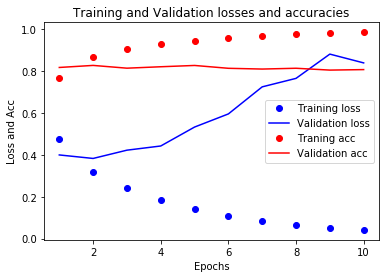

In [13]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss) + 1)
plt.clf()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.plot(epochs, acc, 'ro', label = 'Traning acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and Validation losses and accuracies')
plt.xlabel('Epochs')
plt.ylabel('Loss and Acc')
plt.legend()

plt.show()

In [14]:
network.evaluate(x_test, y_test)

25000/25000 [==============================] - 17s 661us/step


[0.8360146981358528, 0.8074]